In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

In [ ]:
# scramble the cube by n random steps
def scramble(cube, n):
  for i in range(n):
    action = random.randint(0,5)
    cube, reward = step(cube, action)
    #print(action)
  return cube

In [ ]:
# create a solved 2x2 rubik's cube
def create_cube():
  cube = np.ones((6,2,2))
  for i in range(6):
    cube[i,:,:] = cube[i,:,:] * i
  return cube

In [ ]:
# display the flattened cube:
#       up
# left front right
#      down
#      back
def display_cube(cube):
  print('       ', cube[0,0,:])
  print('       ', cube[0,1,:])
  print(cube[4,0,:], cube[1,0,:], cube[5,0,:])
  print(cube[4,1,:], cube[1,1,:], cube[5,1,:])
  print('       ', cube[2,0,:])
  print('       ', cube[2,1,:])
  print('back')
  print('       ', cube[3,0,:])
  print('       ', cube[3,1,:])

In [ ]:
# cube is the state
# 6 actions in total:
# turn top layer left or right (0 or 1)
# turn right part up or down (2 or 3)
# turn back layer clockwise or counter-clockwise (4 or 5)
def step(cube1, action):
  cube = copy.deepcopy(cube1)
  reward = 0
  if action == 0: # turn top layer left
    front = np.copy(cube[1,0,:])
    cube[1,0,:] = cube[5,0,:] # right goes to front
    cube[5,0,:] = cube[3,0,:] # back goes to right
    cube[3,0,:] = cube[4,0,:] # left goes to back
    cube[4,0,:] = front # front goes to left
    # turn the up face clockwise
    up00 = np.copy(cube[0,0,0])
    cube[0,0,0] = cube[0,1,0]
    cube[0,1,0] = cube[0,1,1]
    cube[0,1,1] = cube[0,0,1]
    cube[0,0,1] = up00
  elif action == 1: # turn top layer right
    front = np.copy(cube[1,0,:])
    cube[1,0,:] = cube[4,0,:] # left goes to front
    cube[4,0,:] = cube[3,0,:] # back goes to left
    cube[3,0,:] = cube[5,0,:] # right goes to back
    cube[5,0,:] = front # front goes to right
    # turn the up face counter-clockwise
    up00 = np.copy(cube[0,0,0])
    cube[0,0,0] = cube[0,0,1]
    cube[0,0,1] = cube[0,1,1]
    cube[0,1,1] = cube[0,1,0]
    cube[0,1,0] = up00
  elif action == 2: # turn right part up
    front = np.copy(cube[1,:,1])
    cube[1,:,1] = cube[2,:,1] # down goes to front
    cube[2,0,1] = cube[3,1,0] # back goes to down
    cube[2,1,1] = cube[3,0,0] # back goes to down
    cube[3,1,0] = cube[0,0,1] # up goes to back
    cube[3,0,0] = cube[0,1,1] # up goes to back
    cube[0,:,1] = front # front goes to up
    # turn the right face clockwise
    right00 = np.copy(cube[5,0,0])
    cube[5,0,0] = cube[5,1,0]
    cube[5,1,0] = cube[5,1,1]
    cube[5,1,1] = cube[5,0,1]
    cube[5,0,1] = right00
  elif action == 3: # turn right part down
    front = np.copy(cube[1,:,1])
    cube[1,:,1] = cube[0,:,1] # up goes to front
    cube[0,0,1] = cube[3,1,0] # back goes to up
    cube[0,1,1] = cube[3,0,0] # back goes to up
    cube[3,1,0] = cube[2,0,1] # down goes to back
    cube[3,0,0] = cube[2,1,1] # down goes to back
    cube[2,:,1] = front # front goes to down
    # turn the right face counter-clockwise
    right00 = np.copy(cube[5,0,0])
    cube[5,0,0] = cube[5,0,1]
    cube[5,0,1] = cube[5,1,1]
    cube[5,1,1] = cube[5,1,0]
    cube[5,1,0] = right00
  elif action == 4: # turn back layer clockwise
    up = np.copy(cube[0,0,:])
    cube[0,0,0] = cube[4,1,0] # left goes to up
    cube[0,0,1] = cube[4,0,0] # left goes to up
    cube[4,:,0] = cube[2,1,:] # down goes to left
    cube[2,1,0] = cube[5,1,1] # right goes to down
    cube[2,1,1] = cube[5,0,1] # right goes to down
    cube[5,:,1] = up # up goes to right
    # turn the back face counter-clockwise
    back00 = np.copy(cube[3,0,0])
    cube[3,0,0] = cube[3,0,1]
    cube[3,0,1] = cube[3,1,1]
    cube[3,1,1] = cube[3,1,0]
    cube[3,1,0] = back00
  elif action == 5: # turn back layer counter-clockwise
    up = np.copy(cube[0,0,:])
    cube[0,0,:] = cube[5,:,1] # right goes to up
    cube[5,0,1] = cube[2,1,1] # down goes to right
    cube[5,1,1] = cube[2,1,0] # down goes to right
    cube[2,1,:] = cube[4,:,0] # left goes to down
    cube[4,1,0] = up[0] # up goes to left
    cube[4,0,0] = up[1] # up goes to left
    # turn the back face clockwise
    back00 = np.copy(cube[3,0,0])
    cube[3,0,0] = cube[3,1,0]
    cube[3,1,0] = cube[3,1,1]
    cube[3,1,1] = cube[3,0,1]
    cube[3,0,1] = back00
  if (map_to_8(create_cube())==map_to_8(cube)).all():
    reward = 1
  return cube, reward

In [ ]:
# Helper function of map_to_8(), help identify the label of the small cube
# The labels are from 0-7
def map_helper(color):
  color_sum = np.sum(color)
  cube_label = 4 # color_sum = 5
  if color_sum == 6:
    cube_label = 5
  elif color_sum == 7:
    cube_label = 0
    if 0 in color: 
      cube_label = 6
  elif color_sum == 8:
    cube_label = 1
    if 0 in color:
      cube_label = 7
  elif color_sum == 9:
    cube_label = 2
  elif color_sum == 10:
    cube_label = 3
  return cube_label

In [ ]:
# map the cube to 8 small cubes representation, which has less information
# about the cube, but also smaller state space
def map_to_8(cube):
  color = np.zeros((8, 3))
  # small cube at front bottom left corner
  color[0,0] = cube[4,1,1]
  color[0,1] = cube[1,1,0]
  color[0,2] = cube[2,0,0]
  # small cube at front bottom right corner
  color[1,0] = cube[5,1,0]
  color[1,1] = cube[1,1,1]
  color[1,2] = cube[2,0,1]
  # small cube at back bottom left corner
  color[2,0] = cube[4,1,0]
  color[2,1] = cube[2,1,0]
  color[2,2] = cube[3,1,1]
  # small cube at back bottom right corner
  color[3,0] = cube[5,1,1]
  color[3,1] = cube[2,1,1]
  color[3,2] = cube[3,1,0]
  # small cube at front top left corner
  color[4,0] = cube[0,1,0]
  color[4,1] = cube[4,0,1]
  color[4,2] = cube[1,0,0]
  # small cube at front top right corner
  color[5,0] = cube[0,1,1]
  color[5,1] = cube[5,0,0]
  color[5,2] = cube[1,0,1]
  # small cube at back top left corner
  color[6,0] = cube[0,0,0]
  color[6,1] = cube[4,0,0]
  color[6,2] = cube[3,0,1]
  # small cube at back top right corner
  color[7,0] = cube[0,0,1]
  color[7,1] = cube[5,0,1]
  color[7,2] = cube[3,0,0]
  cube_labels = np.zeros((8))
  for i in range(np.size(color, 0)):
    cube_labels[i] = map_helper(color[i,:])
  return cube_labels

In [ ]:
# visualize the cube labels in the form of two matrices
# one represents the top layer, the other the bottom layer
# a solved cube would looks like:
# [6. 7.]
# [4. 5.]
# =     =
# [2. 3.]
# [0. 1.]
def display_cube_labels(cube_labels):
  top_layer = np.zeros((2,2))
  bottom_layer = np.zeros((2,2))
  bottom_layer[0,0] = cube_labels[2]
  bottom_layer[0,1] = cube_labels[3]
  bottom_layer[1,0] = cube_labels[0]
  bottom_layer[1,1] = cube_labels[1]
  top_layer[0,0] = cube_labels[6]
  top_layer[0,1] = cube_labels[7]
  top_layer[1,0] = cube_labels[4]
  top_layer[1,1] = cube_labels[5]
  print(top_layer[0,:])
  print(top_layer[1,:])
  print('=     =')
  print(bottom_layer[0,:])
  print(bottom_layer[1,:])

In [ ]:
# check map_to_8 function
take_steps = [4,2,0,4,2,1,5,3,2,4]
cube = create_cube()
for i in take_steps:
  cube,reward = step(cube, i)
  print(i)
  #display_cube(cube)
  display_cube_labels(map_to_8(cube))

4
[2. 6.]
[4. 5.]
=     =
[3. 7.]
[0. 1.]
2
[2. 5.]
[4. 1.]
=     =
[3. 6.]
[0. 7.]
0
[4. 2.]
[1. 5.]
=     =
[3. 6.]
[0. 7.]
4
[3. 4.]
[1. 5.]
=     =
[6. 2.]
[0. 7.]
2
[3. 5.]
[1. 7.]
=     =
[6. 4.]
[0. 2.]
1
[5. 7.]
[3. 1.]
=     =
[6. 4.]
[0. 2.]
5
[7. 4.]
[3. 1.]
=     =
[5. 6.]
[0. 2.]
3
[7. 6.]
[3. 4.]
=     =
[5. 2.]
[0. 1.]
2
[7. 4.]
[3. 1.]
=     =
[5. 6.]
[0. 2.]
4
[5. 7.]
[3. 1.]
=     =
[6. 4.]
[0. 2.]


In [ ]:
# check step
solved_cube = create_cube()
for i in range(6):
  cube = create_cube()
  cube,reward = step(cube, i)
  display_cube(cube)
  print('reward: ', reward)

        [0. 0.]
        [0. 0.]
[1. 1.] [5. 5.] [3. 3.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [4. 4.]
        [3. 3.]
reward:  0
        [0. 0.]
        [0. 0.]
[3. 3.] [4. 4.] [1. 1.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [5. 5.]
        [3. 3.]
reward:  0
        [0. 1.]
        [0. 1.]
[4. 4.] [1. 2.] [5. 5.]
[4. 4.] [1. 2.] [5. 5.]
        [2. 3.]
        [2. 3.]
back
        [0. 3.]
        [0. 3.]
reward:  0
        [0. 3.]
        [0. 3.]
[4. 4.] [1. 0.] [5. 5.]
[4. 4.] [1. 0.] [5. 5.]
        [2. 1.]
        [2. 1.]
back
        [2. 3.]
        [2. 3.]
reward:  0
        [4. 4.]
        [0. 0.]
[2. 4.] [1. 1.] [5. 0.]
[2. 4.] [1. 1.] [5. 0.]
        [2. 2.]
        [5. 5.]
back
        [3. 3.]
        [3. 3.]
reward:  0
        [5. 5.]
        [0. 0.]
[0. 4.] [1. 1.] [5. 2.]
[0. 4.] [1. 1.] [5. 2.]
        [2. 2.]
        [4. 4.]
back
        [3. 3.]
        [3. 3.]
reward:  0


In [ ]:
# check step
cube = create_cube()
cube,reward = step(cube, 2)
display_cube(cube)
print('reward: ', reward)
cube,reward = step(cube, 5)
display_cube(cube)
print('reward: ', reward)
cube,reward = step(cube, 4)
display_cube(cube)
print('reward: ', reward)
cube,reward = step(cube, 3)
display_cube(cube)
print('reward: ', reward)

        [0. 1.]
        [0. 1.]
[4. 4.] [1. 2.] [5. 5.]
[4. 4.] [1. 2.] [5. 5.]
        [2. 3.]
        [2. 3.]
back
        [0. 3.]
        [0. 3.]
reward:  0
        [5. 5.]
        [0. 1.]
[1. 4.] [1. 2.] [5. 3.]
[0. 4.] [1. 2.] [5. 2.]
        [2. 3.]
        [4. 4.]
back
        [0. 0.]
        [3. 3.]
reward:  0
        [0. 1.]
        [0. 1.]
[4. 4.] [1. 2.] [5. 5.]
[4. 4.] [1. 2.] [5. 5.]
        [2. 3.]
        [2. 3.]
back
        [0. 3.]
        [0. 3.]
reward:  0
        [0. 0.]
        [0. 0.]
[4. 4.] [1. 1.] [5. 5.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [3. 3.]
        [3. 3.]
reward:  1


In [ ]:
# using binary feature to represent the states
# The features are the location of the 8 small cubes.
# The length of the feature vector would be 8*8
def featurize(cube):
  #features = np.zeros((4*6+7*8))
  #for i in range(6):
  #  buffer = cube[i,:,:].reshape((4))
  #  diff_colors = len(set(buffer)) - 1 # diff_colors = 0 when there is only one color
  #  for j in range(4):
  #    if j == diff_colors:
  #      features[i*4 + j] = 1
  #pre_index = 4*6
  features = np.zeros((8*8))
  cube_8 = map_to_8(cube)
  for i in range(8):
    #if i != 4: # the fixed corner
      cube_index = np.where(cube_8 == i)[0][0]
     # print(i, ':',cube_index)
      features[i*8 + cube_index] = 1
     # print(pre_index + i*8 + cube_index)
    #else:
     # pre_index -= 8
  return features

In [ ]:
# represent the action by features as a vector of length 6
# where each entry represnts whether the action at that index is taken
def action_features(action):
  action_feature = np.zeros((6))
  action_feature[action] = 1
  return action_feature

In [ ]:
# combine the action_feature and cube features, which is a vector of length 6*8*8
def combine_features(cube_features, action_feature):
  combined_features = np.zeros((len(cube_features),len(action_feature)))
  cube_index = [i for i, x in enumerate(cube_features) if x == 1]
  action_index = [i for i, x in enumerate(action_feature) if x == 1]
  for i in cube_index:
    for j in action_index:
      combined_features[i,j] = 1
  combined_features = combined_features.T.reshape((len(cube_features)*len(action_feature)))
  return combined_features

In [ ]:
# epsilon-greedy policy, return an action
def policy(cube_features, epsilon, w):
  if random.random() < epsilon:
    return random.randint(0,5)
  else:
    Qs = np.zeros((6))
    for i in range(6):
      Qs[i] = w.T.dot(combine_features(cube_features, action_features(i)))
      if len(set(Qs)) == 1:
        return random.randint(0,5)
    return np.argmax(Qs)

In [ ]:
# gradient Monte Carlo
def Monte_Carlo(cube, alpha, epsilon):
  w = np.zeros((6*8*8))
  cube1 = copy.deepcopy(cube)
  for j in range(10000):
    if j % 1000 == 0:
      print('progress: ', j, '/10000')
    action = 0
    G = 0
    reward = -1
    pair_reached = []
    rewards = []
    steps = 0
    cube2 = copy.deepcopy(cube1)
    while reward != 1 and steps < 3:
      cube_features = featurize(cube2)
      action = policy(cube_features, epsilon, w)
      pair_reached.append([cube_features,action])
      cube2, reward = step(cube2, action)
      rewards.append(reward)
      steps += 1
    for i in range(len(pair_reached)):
      t = len(pair_reached) - 1 - i
      G = G + rewards[t]
      pair = pair_reached[t]
      cube_features = pair[0]
      action = pair[-1]
      action_feature = action_features(action)
      combined_features = combine_features(cube_features, action_feature)
      w = w + alpha*(G - w.T.dot(combined_features))*combined_features
  return w

In [ ]:
cube = scramble(create_cube(), 2)
#cube1, r= step(create_cube(), 0)
display_cube(cube)
display_cube_labels(map_to_8(cube))

        [5. 3.]
        [0. 3.]
[0. 4.] [1. 5.] [2. 2.]
[0. 4.] [1. 0.] [5. 5.]
        [2. 1.]
        [4. 1.]
back
        [4. 3.]
        [2. 3.]
[7. 2.]
[4. 3.]
=     =
[6. 1.]
[0. 5.]


In [ ]:
w = Monte_Carlo(cube, 0.01, 0.1)

progress:  0 /10000
progress:  1000 /10000
progress:  2000 /10000
progress:  3000 /10000
progress:  4000 /10000
progress:  5000 /10000
progress:  6000 /10000
progress:  7000 /10000
progress:  8000 /10000
progress:  9000 /10000


In [ ]:
display_cube_labels(map_to_8(cube))
display_cube(cube)
steps = 0
r = 0
while r != 1 and steps < 3:
  v = np.zeros((6))
  for i in range(6):
    buffer = combine_features(featurize(cube),action_features(i))
    v[i] = w.T.dot(buffer)
  action = np.argmax(v)
  print('action: ', action)
  cube,r = step(cube,action)
  display_cube_labels(map_to_8(cube))
  display_cube(cube)
  steps += 1

[7. 2.]
[4. 3.]
=     =
[6. 1.]
[0. 5.]
        [5. 3.]
        [0. 3.]
[0. 4.] [1. 5.] [2. 2.]
[0. 4.] [1. 0.] [5. 5.]
        [2. 1.]
        [4. 1.]
back
        [4. 3.]
        [2. 3.]
action:  2
[7. 3.]
[4. 5.]
=     =
[6. 2.]
[0. 1.]
        [5. 5.]
        [0. 0.]
[0. 4.] [1. 1.] [5. 2.]
[0. 4.] [1. 1.] [5. 2.]
        [2. 2.]
        [4. 4.]
back
        [3. 3.]
        [3. 3.]
action:  4
[6. 7.]
[4. 5.]
=     =
[2. 3.]
[0. 1.]
        [0. 0.]
        [0. 0.]
[4. 4.] [1. 1.] [5. 5.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [3. 3.]
        [3. 3.]


Part II

In [ ]:
# simplified cube
# Here in order to use tabular methods, I simplified the 2*2 rubik's cube
# by giving the 8 small cubes each a label, from 0-7. By only considering the
# location of the labelled cube, which doesn't take colors into consideration.
# The problem is simplied to getting the 8 cubes into their solved location.

In [ ]:
# epsilon-greedy policy for Monte Carlo Control
def MC_policy(Q_s, epsilon):
  if random.random() < epsilon:
    return random.randint(0,5)
  else:
    if len(set(Q_s)) == 1:
      return random.randint(0,5)
    return np.argmax(Q_s)

In [ ]:
# initialize Q(s,a)
Q = np.zeros((7,7,7,7,7,7,7,6))
Qs = np.zeros((100,7,7,7,7,7,7,7,6))

In [ ]:
# Monte Carlo Control
count = np.zeros((7,7,7,7,7,7,7,6))
iter = 100000
Qs_index = 0
epsilon = 1;
for j in range(iter):
  if j%(iter/10) == 0:
    print('progress: ', j,'/',iter)
  cube1 = scramble(create_cube(), 3)
  cube = copy.deepcopy(cube1)
  reward = 0
  action = 0
  G = 0
  pair_reached = []
  rewards = []
  steps = 0
  while reward != 1 and steps < 5:
    cube_8 = map_to_8(cube)
    # ignore the fixed bottom left corner at the front
    cube_7 = cube_8[1:]
    cube_7 = list(cube_7)
    cube_7 = [int(x) - 1 for x in cube_7]
    action = MC_policy(Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],:], epsilon)
    pair_reached.append([cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action])
    cube, reward = step(cube, action)
    rewards.append(reward)
    steps += 1
  for i in range(len(pair_reached)):
      t = len(pair_reached) - 1 - i
      G = G + rewards[t]
      pair = pair_reached[t]
      first_appear = pair_reached.index(pair) # if this pair appears ealier
      if first_appear == t:
        cube_7 = list(np.zeros((7)))
        for i in range(len(cube_7)):
          cube_7[i] = int(pair[i])
        action = int(pair[7])
        count[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action] += 1
        Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action] = Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action] + \
                      (G - Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action])/count[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action]
        best_action = int(np.argmax(Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],:]))
        minimum_action = min(count[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],:])
        epsilon = 10/(10 + minimum_action)
  if j % (iter/100) == 0:
    Qs[Qs_index,:,:,:,:,:,:,:,:] = Q
    Qs_index += 1

progress:  0 / 100000
progress:  10000 / 100000
progress:  20000 / 100000
progress:  30000 / 100000
progress:  40000 / 100000
progress:  50000 / 100000
progress:  60000 / 100000
progress:  70000 / 100000
progress:  80000 / 100000
progress:  90000 / 100000


In [ ]:
# get the optimal action for each state
Actions = np.zeros((7,7,7,7,7,7,7))
for i0 in range(7):
  for i1 in range(7):
    for i2 in range(7):
      for i3 in range(7):
        for i4 in range(7):
          for i5 in range(7):
            for i6 in range(7):
              Actions[i0,i1,i2,i3,i4,i5,i6] = int(np.argmax(Q[i0,i1,i2,i3,i4,i5,i6,:]))

In [ ]:
# test whether the generated action from Q can solve 3-step cubes
n = 3     # number of scramble steps
test = scramble(create_cube(),n)
print('scrambled cube')
display_cube(test)
print('=======================')
for i in range(n):
  query = list(map_to_8(test))
  query = [int(x) - 1 for x in query]
  action = int(Actions[query[1],query[2],query[3],query[4],query[5],query[6],query[7]])
  print('action: ', action)
  test,r = step(test,action)
  display_cube(test)
  print('=======================')

scrambled cube
        [3. 3.]
        [0. 3.]
[0. 1.] [5. 5.] [2. 2.]
[0. 4.] [1. 0.] [3. 5.]
        [2. 5.]
        [1. 1.]
back
        [4. 4.]
        [2. 4.]
action:  2
        [3. 5.]
        [0. 0.]
[0. 1.] [5. 5.] [3. 2.]
[0. 4.] [1. 1.] [5. 2.]
        [2. 2.]
        [1. 4.]
back
        [3. 4.]
        [3. 4.]
action:  4
        [0. 0.]
        [0. 0.]
[1. 1.] [5. 5.] [3. 3.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [4. 4.]
        [3. 3.]
action:  1
        [0. 0.]
        [0. 0.]
[4. 4.] [1. 1.] [5. 5.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [3. 3.]
        [3. 3.]


In [ ]:
# Initialize Q(s,a) for Sarsa
Sarsa_Q = np.zeros((7,7,7,7,7,7,7,6))
Sarsa_Qs = np.zeros((100,7,7,7,7,7,7,7,6))

In [ ]:
# Sarsa
alpha = 1
epsilon = 1
count = np.zeros((7,7,7,7,7,7,7,6))
iter = 100000
Sarsa_Qs_index = 0
for j in range(iter):
  if j%(iter/10) == 0:
    print('progress: ', j,'/',iter)
  cube1 = scramble(create_cube(), 3)
  cube = copy.deepcopy(cube1)
  reward = 0
  action = random.randint(0,5)
  steps = 0
  while reward != 1 and steps < 5:
    cube_next, reward = step(cube, action)
    cube_8 = map_to_8(cube)
    # ignore the fixed bottom left corner at the front
    cube_7 = cube_8[1:]
    cube_7 = list(cube_7)
    cube_7 = [int(x) - 1 for x in cube_7]
    if reward == 1:
      Sarsa_Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action] = Sarsa_Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action]+\
                                          alpha*(reward-Sarsa_Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action])
    count[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action] += 1
    cube_8_next = map_to_8(cube_next)
    # ignore the fixed bottom left corner at the front
    cube_7_next = cube_8_next[1:]
    cube_7_next = list(cube_7_next)
    cube_7_next = [int(x) - 1 for x in cube_7_next]
    steps += 1
    minimum_action = min(count[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],:])
    epsilon = 10/(10+minimum_action)
    action_next = MC_policy(Q[cube_7_next[0],cube_7_next[1],cube_7_next[2],cube_7_next[3],cube_7_next[4],cube_7_next[5],cube_7_next[6],:], epsilon)
    alpha = 1/count[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action]
    Sarsa_Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action] = Sarsa_Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action]+\
                          alpha*(reward+Sarsa_Q[cube_7_next[0],cube_7_next[1],cube_7_next[2],cube_7_next[3],cube_7_next[4],cube_7_next[5],cube_7_next[6],action_next]
                                 -Sarsa_Q[cube_7[0],cube_7[1],cube_7[2],cube_7[3],cube_7[4],cube_7[5],cube_7[6],action])
    cube = cube_next
    action = action_next
if j % (iter/100) == 0:
    Sarsa_Qs[Sarsa_Qs_index,:,:,:,:,:,:,:,:] = Sarsa_Q
    Sarsa_Qs_index += 1

progress:  0 / 100000
progress:  10000 / 100000
progress:  20000 / 100000
progress:  30000 / 100000
progress:  40000 / 100000
progress:  50000 / 100000
progress:  60000 / 100000
progress:  70000 / 100000
progress:  80000 / 100000
progress:  90000 / 100000


In [ ]:
# get the optimal action for each state
Sarsa_actions = np.zeros((7,7,7,7,7,7,7))
for i0 in range(7):
  for i1 in range(7):
    for i2 in range(7):
      for i3 in range(7):
        for i4 in range(7):
          for i5 in range(7):
            for i6 in range(7):
              Sarsa_actions[i0,i1,i2,i3,i4,i5,i6] = int(np.argmax(Sarsa_Q[i0,i1,i2,i3,i4,i5,i6,:]))

In [ ]:
# test whether the generated action from Sarsa_Q can solve 3-step cubes
n = 3     # number of scramble steps
test = scramble(create_cube(),n)
print('scrambled cube')
display_cube(test)
print('=======================')
for i in range(n):
  query = list(map_to_8(test))
  query = [int(x) - 1 for x in query]
  action = int(Sarsa_actions[query[1],query[2],query[3],query[4],query[5],query[6],query[7]])
  print('action: ', action)
  test,r = step(test,action)
  display_cube(test)
  print('=======================')

scrambled cube
        [3. 3.]
        [5. 0.]
[4. 3.] [0. 4.] [1. 5.]
[0. 4.] [1. 0.] [5. 5.]
        [2. 1.]
        [4. 1.]
back
        [2. 2.]
        [2. 3.]
action:  0
        [5. 3.]
        [0. 3.]
[0. 4.] [1. 5.] [2. 2.]
[0. 4.] [1. 0.] [5. 5.]
        [2. 1.]
        [4. 1.]
back
        [4. 3.]
        [2. 3.]
action:  2
        [5. 5.]
        [0. 0.]
[0. 4.] [1. 1.] [5. 2.]
[0. 4.] [1. 1.] [5. 2.]
        [2. 2.]
        [4. 4.]
back
        [3. 3.]
        [3. 3.]
action:  4
        [0. 0.]
        [0. 0.]
[4. 4.] [1. 1.] [5. 5.]
[4. 4.] [1. 1.] [5. 5.]
        [2. 2.]
        [2. 2.]
back
        [3. 3.]
        [3. 3.]


In [ ]:
# compute MSE for each 10000th episode
MSEs = np.zeros((100))
for i in range(100):
  current_Q = Qs[i,:,:,:,:,:,:,:,:]
  current_Sarsa_Q = Sarsa_Qs[i,:,:,:,:,:,:,:,:]
  MSE = np.sum(np.square(current_Q - current_Sarsa_Q))
  MSEs[i] = MSE

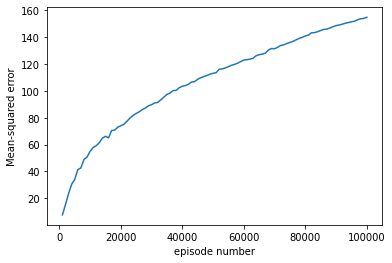

In [ ]:
# plot the MSE
plt.plot(np.arange(1000,100001,1000),MSEs)
plt.xlabel('episode number')
plt.ylabel('Mean-squared error')
plt.show()